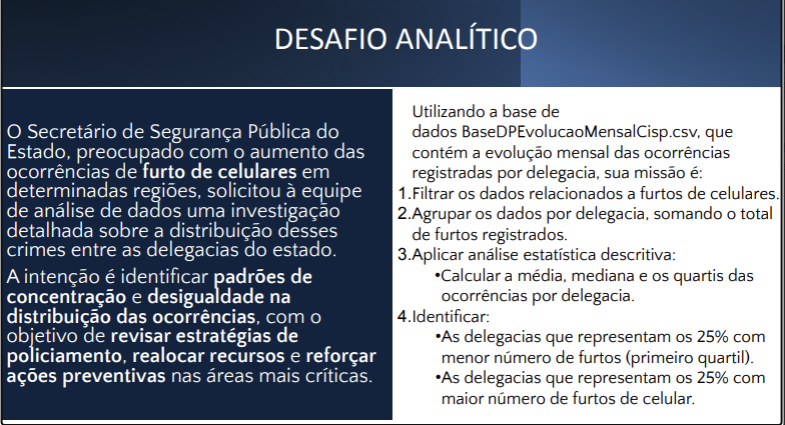

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
df_isp = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';')
df_isp.columns


In [4]:
df_furto_cel = df_isp.groupby('cisp')['furto_celular'].sum().reset_index()
df_furto_cel = df_furto_cel.sort_values(by='furto_celular', ascending=False)
#df_furto_cel

In [5]:
df_furto_cel_array = np.array(df_furto_cel['furto_celular'])
df_furto_cel_array

media_furto_cel = np.mean(df_furto_cel_array)
mediana_furto_cel = np.median(df_furto_cel_array)
q1_furto_cel = np.quantile(df_furto_cel_array, 0.25)
q2_furto_cel = np.quantile(df_furto_cel_array, 0.50)
q3_furto_cel = np.quantile(df_furto_cel_array, 0.75)

distancia = (media_furto_cel-mediana_furto_cel)/mediana_furto_cel
iqr_furto_cel = q3_furto_cel - q1_furto_cel
limite_superior = q3_furto_cel +(1.5 *iqr_furto_cel)
limite_inferior = q1_furto_cel - (1.5 * iqr_furto_cel)

print(f'A média é {media_furto_cel}')
print(f'A mediana é {mediana_furto_cel}')
print(f'Primeiro quartil (Q1): {q1_furto_cel}')
print(f'Segundo quartil (Q2, Mediana): {q2_furto_cel}')
print(f'Terceiro quartil (Q3): {q3_furto_cel}')
print(f'A distancia entre a média e amediana é a de: {distancia}')
print(f'O valor do limite superior é {limite_superior}')
print(f'O valor do limite inferior é {limite_inferior}')



A média é 3338.1159420289855
A mediana é 1633.5
Primeiro quartil (Q1): 449.0
Segundo quartil (Q2, Mediana): 1633.5
Terceiro quartil (Q3): 4498.25
A distancia entre a média e amediana é a de: 1.0435359302289473
O valor do limite superior é 10572.125
O valor do limite inferior é -5624.875


In [6]:
outliers_furto_cel = df_furto_cel[df_furto_cel['furto_celular'] > limite_superior]
outliers_furto_cel

,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
5,9,14159
6,10,14105
1,4,13318
14,18,12939
28,32,12206


In [7]:
outliers_furto_cel.to_csv('outliers_furto_cel.csv', sep= ';', index=False)

In [8]:
delegacias_menor_q1 = df_furto_cel.loc[df_furto_cel['furto_celular'] < q1_furto_cel]
delegacias_menor_q1 = delegacias_menor_q1.sort_values(by='furto_celular', ascending=False)
delegacias_menor_q1

,cisp,furto_celular
99,121,448
90,107,443
84,99,431
85,100,387
7,11,385
60,67,364
79,94,361
115,139,360
86,101,352
111,135,351


In [9]:
delegacias_maior_q3 = df_furto_cel.loc[df_furto_cel['furto_celular'] > q3_furto_cel]
delegacias_maior_q3

,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
5,9,14159
6,10,14105
1,4,13318
14,18,12939
28,32,12206


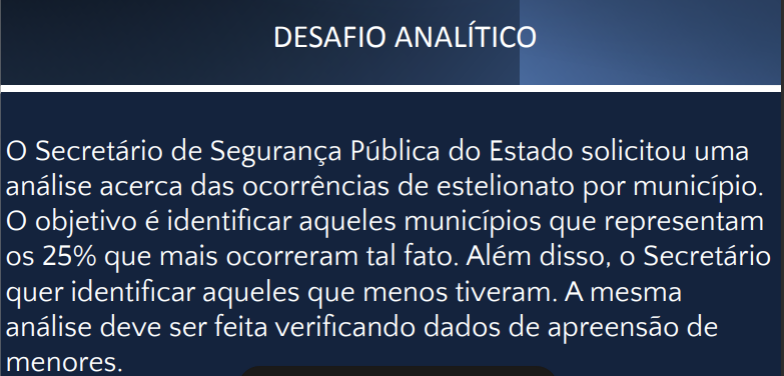

In [10]:
df_estelio_munic = df_isp.groupby('munic')['estelionato'].sum().reset_index()
df_estelio_munic = df_estelio_munic.sort_values(by='estelionato', ascending=False)
df_estelio_munic_array = np.array(df_estelio_munic['estelionato'])
df_estelio_munic_array

array([606042,  50603,  41281,  37222,  36742,  23172,  22142,  17251,
        16577,  16050,  15785,  11407,  11041,  10728,  10237,   9967,
         9928,   8359,   8335,   8208,   8019,   8001,   7443,   6461,
         6358,   6196,   5201,   4402,   4240,   3843,   3282,   3223,
         2854,   2410,   2338,   2159,   2146,   2024,   2018,   1941,
         1855,   1819,   1610,   1481,   1479,   1465,   1396,   1385,
         1332,   1315,   1308,   1215,   1214,   1176,   1031,   1008,
          978,    944,    873,    872,    867,    814,    799,    794,
          764,    748,    647,    637,    624,    622,    621,    547,
          517,    517,    468,    462,    443,    379,    370,    352,
          328,    324,    271,    230,    176,    173,    138,     50,
            8,      7])

In [11]:
media_estel_munic = np.mean(df_estelio_munic_array)
mediana_estel_munic = np.median(df_estelio_munic_array)
distancia_estel_munic = (media_estel_munic - mediana_estel_munic)/mediana_estel_munic

q1_estel_munic = np.quantile(df_estelio_munic_array, 0.25)
q2_estel_munic = np.quantile(df_estelio_munic_array, 0.50)
q3_estel_munic = np.quantile(df_estelio_munic_array, 0.75)

print(f'A média é {media_estel_munic}')
print(f'A mediana é {mediana_estel_munic}')
print(f'Primeiro quartil (Q1): {q1_estel_munic}')
print(f'Segundo quartil (Q2, Mediana): {q2_estel_munic}')
print(f'Terceiro quartil (Q3): {q3_estel_munic}')
print(f'A distancia entre a média e amediana é a de: {distancia_estel_munic}')

A média é 12167.655555555555
A mediana é 1472.0
Primeiro quartil (Q1): 639.5
Segundo quartil (Q2, Mediana): 1472.0
Terceiro quartil (Q3): 7197.5
A distancia entre a média e amediana é a de: 7.266070350241546


In [12]:
munic_menos_q1 = df_estelio_munic.loc[df_estelio_munic['estelionato']< q1_estel_munic]
munic_menos_q1

,munic,estelionato
17,Carmo,637
39,Magé;Guapimirim,624
20,Conceição de Macabú,622
74,Silva Jardim,621
46,Natividade;Varre-Sai,547
58,Porciúncula,517
71,Sapucaia,517
79,São José do Vale do Rio Preto,468
65,Rio Claro,462
16,Cardoso Moreira;Italva,443


In [13]:
munic_mais_q3 = df_estelio_munic.loc[df_estelio_munic['estelionato'] > q3_estel_munic]
munic_mais_q3

,munic,estelionato
68,Rio de Janeiro,606042
48,Niterói,50603
23,Duque de Caxias,41281
78,São Gonçalo,37222
50,Nova Iguaçu,36742
81,São João de Meriti,23172
13,Campos dos Goytacazes,22142
54,Petrópolis,17251
36,Macaé,16577
89,Volta Redonda,16050


In [14]:
df_apreensao_menores = df_isp.groupby('munic')['aaapai'].sum().reset_index()
df_apreensao_menores = df_apreensao_menores.sort_values(by='aaapai', ascending= False)
df_apreensao_menores


,munic,aaapai
68,Rio de Janeiro,48246.0
78,São Gonçalo,7176.0
23,Duque de Caxias,6244.0
13,Campos dos Goytacazes,5468.0
48,Niterói,5316.0
...,...,...
75,Sumidouro,13.0
66,Rio das Flores,12.0
14,Campos dos Goytacazes;São Francisco de Itabapoana,0.0
57,Piraí;Pinheiral,0.0


In [15]:
df_apreensao_menores_array = np.array(df_apreensao_menores['aaapai'])
df_apreensao_menores_array

array([4.8246e+04, 7.1760e+03, 6.2440e+03, 5.4680e+03, 5.3160e+03,
       4.1150e+03, 3.1110e+03, 2.9650e+03, 2.6050e+03, 2.2100e+03,
       2.1060e+03, 1.9350e+03, 1.8510e+03, 1.7420e+03, 1.5720e+03,
       1.5690e+03, 1.4340e+03, 1.2610e+03, 1.2200e+03, 1.1750e+03,
       1.1120e+03, 9.5700e+02, 9.4200e+02, 9.1100e+02, 8.8500e+02,
       6.9800e+02, 6.8100e+02, 6.6900e+02, 6.5200e+02, 5.7400e+02,
       5.3500e+02, 5.1100e+02, 4.7800e+02, 4.0200e+02, 3.7500e+02,
       3.7400e+02, 3.6000e+02, 3.3400e+02, 3.2400e+02, 3.1500e+02,
       3.1100e+02, 3.0900e+02, 3.0300e+02, 2.9900e+02, 2.9800e+02,
       2.9700e+02, 2.8600e+02, 2.7400e+02, 2.6500e+02, 2.6000e+02,
       2.5300e+02, 2.5200e+02, 2.2000e+02, 2.1300e+02, 1.9400e+02,
       1.6800e+02, 1.6200e+02, 1.5500e+02, 1.4500e+02, 1.3400e+02,
       1.2600e+02, 1.1300e+02, 1.1100e+02, 1.0700e+02, 9.3000e+01,
       8.8000e+01, 8.6000e+01, 8.6000e+01, 8.0000e+01, 7.3000e+01,
       7.2000e+01, 6.2000e+01, 6.1000e+01, 6.0000e+01, 4.5000e

In [16]:
media_apreensao_munic = np.mean(df_apreensao_menores_array)
mediana_apreensao_munic = np.median(df_apreensao_menores_array)
distancia_apreensao_munic = (media_apreensao_munic - mediana_apreensao_munic)/mediana_apreensao_munic

q1_apreensao_munic = np.quantile(df_apreensao_menores_array, 0.25)
q2_apreensao_munic = np.quantile(df_apreensao_menores_array, 0.50)
q3_apreensao_munic = np.quantile(df_apreensao_menores_array, 0.75)

print(f'A média é {media_apreensao_munic}')
print(f'A mediana é {mediana_apreensao_munic}')
print(f'Primeiro quartil (Q1): {q1_apreensao_munic}')
print(f'Segundo quartil (Q2, Mediana): {q2_apreensao_munic}')
print(f'Terceiro quartil (Q3): `{q3_apreensao_munic}')
print(f'A distancia entre a média e amediana é a de: {distancia_apreensao_munic}')

A média é 1353.2444444444445
A mediana é 297.5
Primeiro quartil (Q1): 86.0
Segundo quartil (Q2, Mediana): 297.5
Terceiro quartil (Q3): `934.25
A distancia entre a média e amediana é a de: 3.5487208216619983


In [17]:
munic_menor_apreensao_q1 = df_apreensao_menores.loc[df_apreensao_menores['aaapai'] < q1_apreensao_munic]
munic_menor_apreensao_q1 = munic_menor_apreensao_q1.sort_values(by='aaapai', ascending= True)   
munic_menor_apreensao_q1

,munic,aaapai
57,Piraí;Pinheiral,0.0
61,Queimados;Japeri,0.0
14,Campos dos Goytacazes;São Francisco de Itabapoana,0.0
66,Rio das Flores,12.0
75,Sumidouro,13.0
86,Trajano de Morais,14.0
83,São Sebastião do Alto,16.0
69,Santa Maria Madalena,18.0
79,São José do Vale do Rio Preto,27.0
35,Laje do Muriaé,28.0


In [18]:
munic_maior_apreensao_q3 = df_apreensao_menores.loc[df_apreensao_menores['aaapai']> q3_apreensao_munic]
munic_maior_apreensao_q3

,munic,aaapai
68,Rio de Janeiro,48246.0
78,São Gonçalo,7176.0
23,Duque de Caxias,6244.0
13,Campos dos Goytacazes,5468.0
48,Niterói,5316.0
50,Nova Iguaçu,4115.0
9,Cabo Frio,3111.0
81,São João de Meriti,2965.0
6,Belford Roxo,2605.0
89,Volta Redonda,2210.0


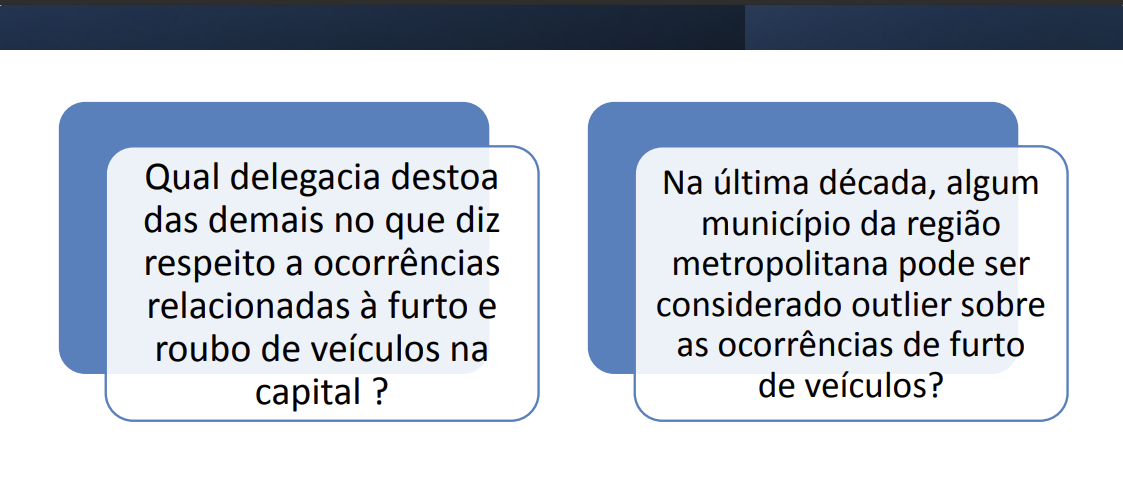

In [19]:
df_capital = df_isp.loc[df_isp['munic'] == 'Rio de Janeiro']
df_capital['soma veiculo'] = df_capital['furto_veiculos'] + df_capital['roubo_veiculo']


C:\Users\karam\AppData\Local\Temp\ipykernel_9684\4263027396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capital['soma veiculo'] = df_capital['furto_veiculos'] + df_capital['roubo_veiculo']


In [20]:
df_veiculo_capital = df_capital.groupby('cisp')['soma veiculo'].sum().reset_index()
df_veiculo_capital = df_veiculo_capital.sort_values(by='soma veiculo', ascending=False)
array_df_veiculo_capital = np.array(df_veiculo_capital['soma veiculo'])
array_df_veiculo_capital

array([39024, 36897, 33436, 32500, 25999, 25899, 25267, 22896, 22451,
       21722, 18151, 17822, 17650, 17163, 15245, 14626, 14437, 13884,
       13238, 12938, 12705, 12697, 11250, 11239, 10398, 10180, 10175,
       10108, 10077,  9669,  6777,  4428,  4343,  3941,  3506,  3402,
        3083,  2494,  2408,  1488,   181,    78])

In [21]:
media = np.mean(array_df_veiculo_capital)
mediana = np.median(array_df_veiculo_capital)
distancia = (media - mediana)/mediana

q1_veiculo_capital = np.quantile(array_df_veiculo_capital, 0.25)
q2_veiculo_capital = np.quantile(array_df_veiculo_capital, 0.50)
q3_veiculo_capital = np.quantile(array_df_veiculo_capital, 0.75)

iqr_veiculo_capital = q3_veiculo_capital - q1_veiculo_capital
limite_superior_veiculo = q3_veiculo_capital + (1.5 *iqr_veiculo_capital)
limite_inferior_veiculo = q1_veiculo_capital - (1.5 * iqr_veiculo_capital)

print(f'A média é {media}')
print(f'A mediana é {mediana}')
print(f'A distancia entre a média e amediana é a de: {distancia}')

print(f'Primeiro quartil (Q1): {q1_veiculo_capital}')
print(f'Segundo quartil (Q2, Mediana): {q2_veiculo_capital}')
print(f'Terceiro quartil (Q3): {q3_veiculo_capital}')


print(f'O intervalo interquartil é {iqr_veiculo_capital}')
print(f'O valor do limite superior é {limite_superior_veiculo}')
print(f'O valor do limite inferior é {limite_inferior_veiculo}')




A média é 13949.333333333334
A mediana é 12701.0
A distancia entre a média e amediana é a de: 0.098286224181823
Primeiro quartil (Q1): 5015.25
Segundo quartil (Q2, Mediana): 12701.0
Terceiro quartil (Q3): 18068.75
O intervalo interquartil é 13053.5
O valor do limite superior é 37649.0
O valor do limite inferior é -14565.0


In [22]:
# outliers_furto_cel = df_furto_cel[df_furto_cel['furto_celular'] > limite_superior]

outliers_veiculo_superior = df_veiculo_capital[df_veiculo_capital['soma veiculo'] > limite_superior_veiculo]
outliers_veiculo_superior

,cisp,soma veiculo
23,27,39024


In [23]:
outliers_veiculo_inferior = df_veiculo_capital[df_veiculo_capital['soma veiculo'] < limite_inferior_veiculo]
outliers_veiculo_inferior

,cisp,soma veiculo


In [24]:
#exemplo aleatorio

#rj_nit = ['Rio de Janeiro', 'Niteroi]

#df_capital = df.loc[df['munic'].isin(rj_nit)]
# df_capital['veiculo'] = df_capital ['furto_veiculos'] + df_capital['roubo_veiculo']
# df_capital

In [ ]:
# #resolução gustavo

# df_veiculo_metropole = df.veiculo[(df['regiao'] != 'Interior' )]
# df_veiculo_metropole = df_veiculo_metropole.loc[(df_veiculo_metropole[('ano')]  >= 2015 )]
# df_veiculo_metropole = df_veiculo_metropole.groupby('munic')['furto_veiculos'].sum().reset_index()
# df_veiculo_metropole =  df_veiculo_metropole.sort_values(by='furto_veiculos', ascending = False)
# df_veiculo_metropole